# Oscar Dominguez

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Q1. Do smokers have higher insurance charges than non-smokers?

Hypothesis - 
- Null hypothesis - there is no difference in insurance charges between smokers and non-smokers

- Alternate hypothesis - there IS a difference in insurance charges between smokers and non-smokers

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Intro to T-testing


In [4]:
# Getting mean values for each group
smoker_charges = df.loc[ df['smoker']=='yes',"charges"]
non_smoker_charges = df.loc[ df['smoker']=='no',"charges"]

## Getting means for gender height
print(f"For smoker (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")
print(f"For non_smoker (n={len(non_smoker_charges)}): Mean={np.mean(non_smoker_charges):.2f}''\n")


For smoker (n=274): Mean=32050.23
For non_smoker (n=1064): Mean=8434.27''



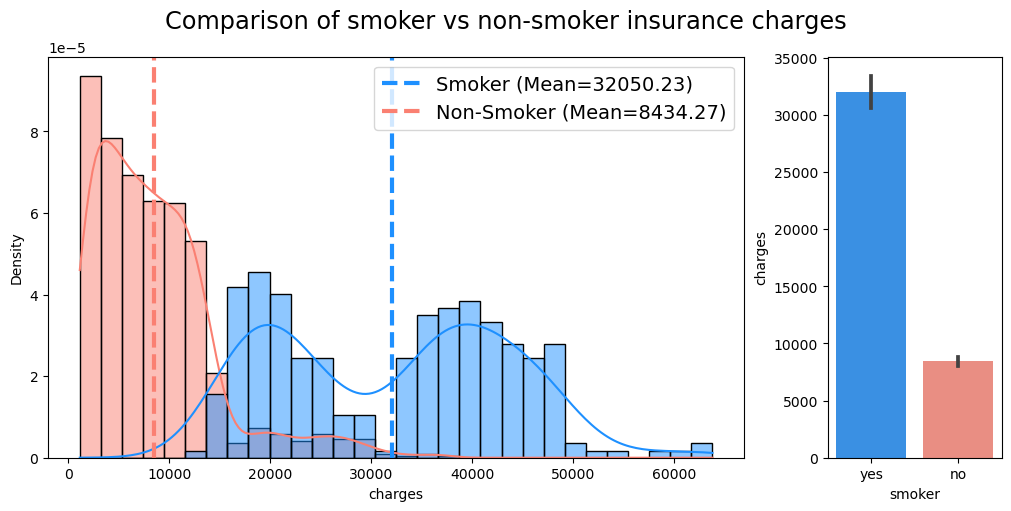

In [5]:
#PLotting values
gender_palette={'yes':'dodgerblue', "no":'salmon'}
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})
# Histogram

ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=gender_palette)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smoker (Mean={np.mean(smoker_charges):.2f})",color=gender_palette['yes'])

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-Smoker (Mean={np.mean(non_smoker_charges):.2f})",color=gender_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=gender_palette)
fig.suptitle('Comparison of smoker vs non-smoker insurance charges',fontsize='xx-large');

# Walk-through T-test

In [6]:
# Checking for outliers

zscores_f = stats.zscore(smoker_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [7]:
# Checking for outliers
zscores_f = stats.zscore(non_smoker_charges)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

24

In [8]:
# remove outliers from strength group
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]


## Normality test

In [9]:
# test the smoker group for normality
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [10]:
# test the non_smoker group for normality
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

## Equal Variance test

In [11]:
# Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

## T-test 

In [12]:
# Independent t-test with equal_var set to False based on out p value 
# in the Equals variance test
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result


Ttest_indResult(statistic=33.732305987092516, pvalue=2.5753226625873578e-104)

## Answer - yes, there is a significant difference between smoker and non-smoker insurance charges based on our P value and T-test. 
## We reject the null hypothesis in support of the alternate hypothesis because there is a statistical difference between groups.

# --------------------------------------------------------------------

# Q2. Are men more likely to smoke than women?
Hypothesis - 
- Null hypothesis - there is no difference between men and women being more likely to smoke.

- Alternate hypothesis - there is a difference between men and women being more likely to smoke

In [13]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

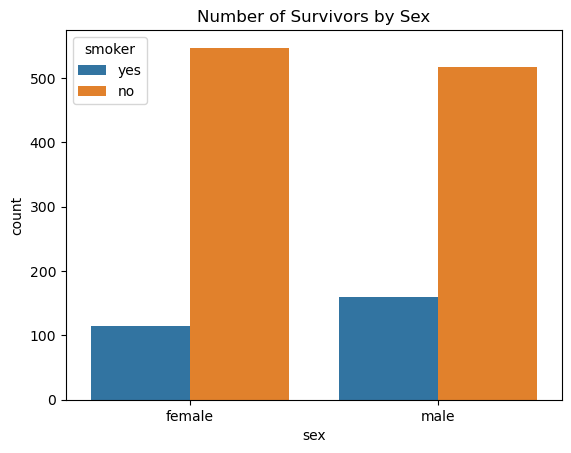

In [14]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Survivors by Sex");


In [15]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table


smoker,no,yes
sex,,
female,547,115
male,517,159


In [16]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [17]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

## Answer -  yes, we reject the null hypothesis and accept the alternative hypothesis. There is meaningful difference between the two groups male and female more likely to be smokers.
## We reject the null hypothesis in support of the alternate hypothesis because there is a statistical difference between groups.

# ---------------------------------------------------------------------

# Q3. Do different regions have different charges, on average?

Hypothesis - 



- The null hypothesis - all group's means are the same. (There is no statistical difference between groups.)

- Alternate hypothesis - there is a difference in group's means. (There is a statistical difference between groups.)

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

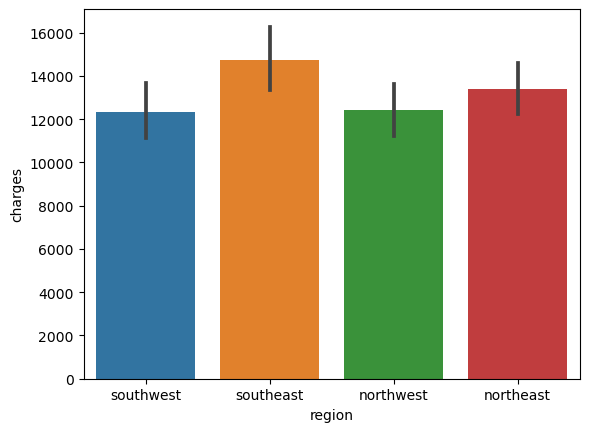

In [19]:
#Plotting different regions or groups and displaying charges for each
sns.barplot(data=df, x='region',y='charges');

## Separating Groups



In [20]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing for assumption of Normality. (Result - we could not assume normality because our p value was less than 5 for all regions/groups)

In [21]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [22]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


## Testing Assumption of Equal Variance

In [23]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

## One-Way ANOVA Test


In [24]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
# Our Kruskal test tells us that our P value is over .05 meaning we 
# fail to reject the null hypothesis but we will run a tukeyhsd multiple 
# comparison test to get the P value for groups compared

result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

In [25]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values as kg_lost and the labels to the Diet
values = df['charges']
labels = df['region']

In [26]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()


group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


# Anwer - Tukeyhsd multiple comparison test confirms there is a slight difference between regions northeast and southeast. There was also a difference between southeast and southwest. 

# Conclusion - we reject the null hypothesis in support of the alternate hypothesis because there is a statistical difference between groups.